<a href="https://colab.research.google.com/github/letrein/Freelancer-Formularios-Universidade/blob/main/PROJETO_DOCENTES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AVALIAÇÃO DE PROFESSORES DE UNIVERSIDADE PARTICULAR

Esse trabalho consiste na criação de gráficos para o relatório do coordenador responsável pelos cursos.

## LIMPEZA DADOS
- A limpeza foi feita via excel por maior facilidade devido formato original do arquivo, já em excel.

- Pela natureza dos dados de serem oriundos de questionários realizados em uma faculdade acerca da compreensão dos alunos dos docentes que lecionaram no semestre decorrido, foram necessárias diversas adequação para limpeza e organização correta dos dados.

- Os dados vieram de 18 questionários preenchidos por diversas turmas, o número de respostas variou de 3 à 13 respostas por turma.  

- Pelo pequeno número de respostas, os cursos foram unidos e os professores que lecionaram em mais de uma turma no semestre também tiveram suas notas unidas independente da disciplina lecionada.

- O questionário tinha como possíveis respostas " concordo plenamente Score: 4,1 - 5 "; "concordo parcialmente  Score: 3,1 - 4"; etc, sendo necessária adequeação para a numeração inteira de 1 à 5 para cálculos.

- Ainda, foi necessária adequação das colunas para modo leitura acessível ao programa para redução de erros, onde "Domínio conteúdo" passa ser tratado como "dominio_conteudo".

- E, para finalização da limpeza, os nomes dos docentes foram adequados e uniformizados, uma vez que os nomes possuiam pequenas variações de escrita. A exemplo: "Janaína Kohl B de Souza"; "Janaina Kohl B de Souza";"Janaína K B de Souza" sendo necessária padronização para poder ser unida posteriormente pelo algoritmo sem problemas.

- Todos os arquivos foram salvos em csv com o formato padrão "NILCE_DADOS_BRUTOS -curso_limpo.csv", onde o curso variou entre
dir (direito), enf (enfermagem), biomed (biomedicina), farm (farmácia) e psico (psicologia).

- o trabalho foi feito pelo google colab para acesso remoto via web ao trabalho.

In [2]:
# Importanto pacotes a serem utilizados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# GRÁFICO TODOS PARAMETROS

Adequar o curso, com dados já limpos na primeira parte

In [ ]:

caminho = "/content/NILCE_DADOS_BRUTOS - psico_limpo.csv"  ## MUDAR O CURSO
# Leitura do arquivo CSV com tratamento de erros
df = pd.read_csv(caminho,
                 sep=',', encoding='utf-8')
# Exibir as primeiras linhas do DataFrame
df.head()

,docente,plano_de_ensino,dominio_conteudo,exemplos_realidades,recuros_didatica,clareza_objetividade,atendimento_discente,assiduo_pontual,avaliacoes_compativeis,devolutiva,respeito_cortezia,nota_geral
0,Amanda A. Lemes Jambersi,5,5,5,5,5,5,5,5,5,5,5
1,Amanda A. Lemes Jambersi,5,5,4,5,5,4,5,5,5,5,5
2,Amanda A. Lemes Jambersi,5,5,5,5,5,5,5,5,5,5,5
3,Amanda A. Lemes Jambersi,5,5,5,5,5,5,5,5,5,5,5
4,Amanda A. Lemes Jambersi,5,5,5,5,5,5,5,5,5,5,5


In [ ]:
#s Selecionando colunas de interesse
COLUNAS_NOTAS = [
    'plano_de_ensino', 'dominio_conteudo', 'exemplos_realidades',
    'recuros_didatica', 'clareza_objetividade', 'atendimento_discente',
    'assiduo_pontual', 'avaliacoes_compativeis', 'devolutiva',
    'respeito_cortezia'
]

In [ ]:
medias_por_docente = df.groupby('docente')[COLUNAS_NOTAS].mean()

In [ ]:
print("DataFrame de Médias por Docente (Amostra):")
print(medias_por_docente.head())

DataFrame de Médias por Docente (Amostra):
                          plano_de_ensino  dominio_conteudo  \
docente                                                       
Amanda A. Lemes Jambersi         5.000000          5.000000   
Fabio Luis da Silva              4.100000          4.200000   
Leonardo C S de Paulo            5.000000          5.000000   
Luiz Carlos G Alves              4.888889          4.888889   

                          exemplos_realidades  recuros_didatica  \
docente                                                           
Amanda A. Lemes Jambersi             4.900000          5.000000   
Fabio Luis da Silva                  4.400000          4.100000   
Leonardo C S de Paulo                4.666667          4.666667   
Luiz Carlos G Alves                  4.666667          4.777778   

                          clareza_objetividade  atendimento_discente  \
docente                                                                
Amanda A. Lemes Jambersi       

### AUTOMATIZAÇÃO DE CRIAÇÃO DOS GRÁFICOS INDIVIDUAIS POR PROFESSOR

/tmp/ipython-input-3238106477.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  PALETA_CORES = plt.cm.get_cmap('Paired', len(COLUNAS_RENOMEADAS))


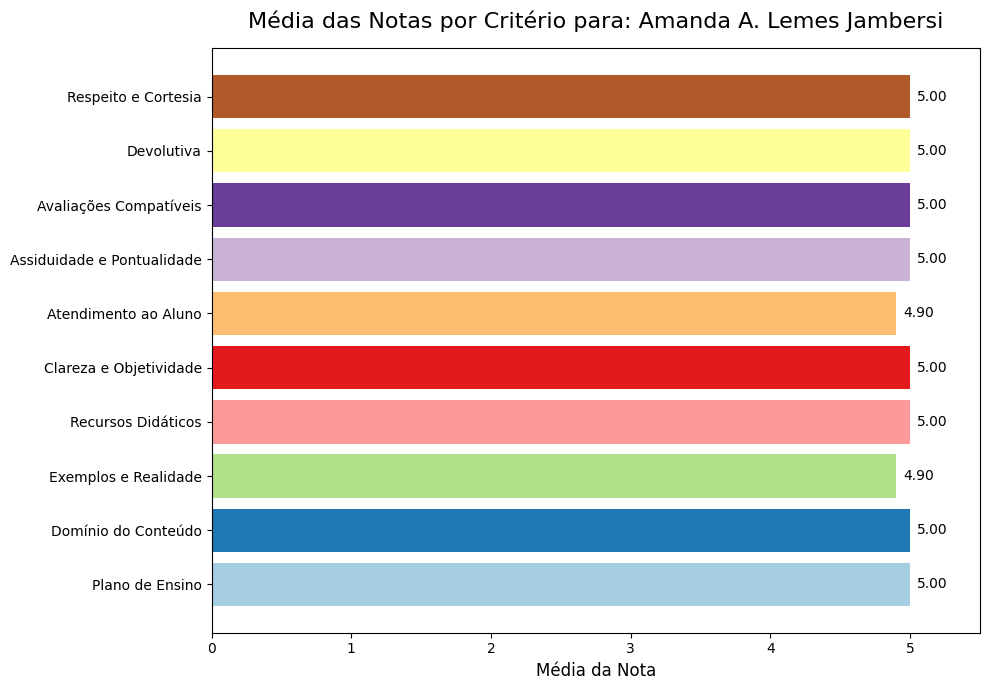

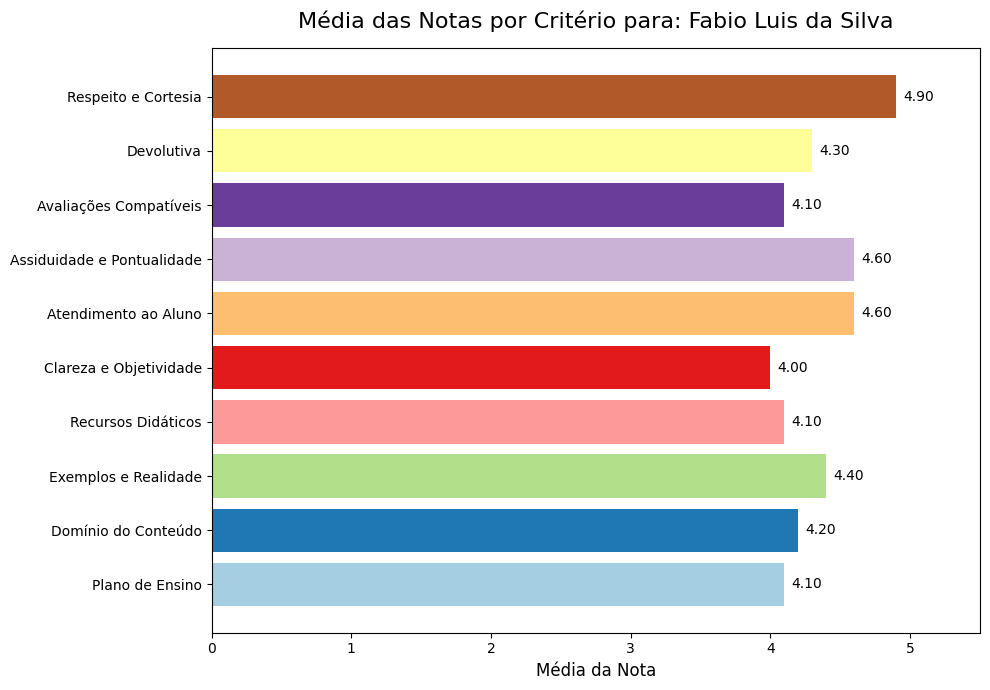

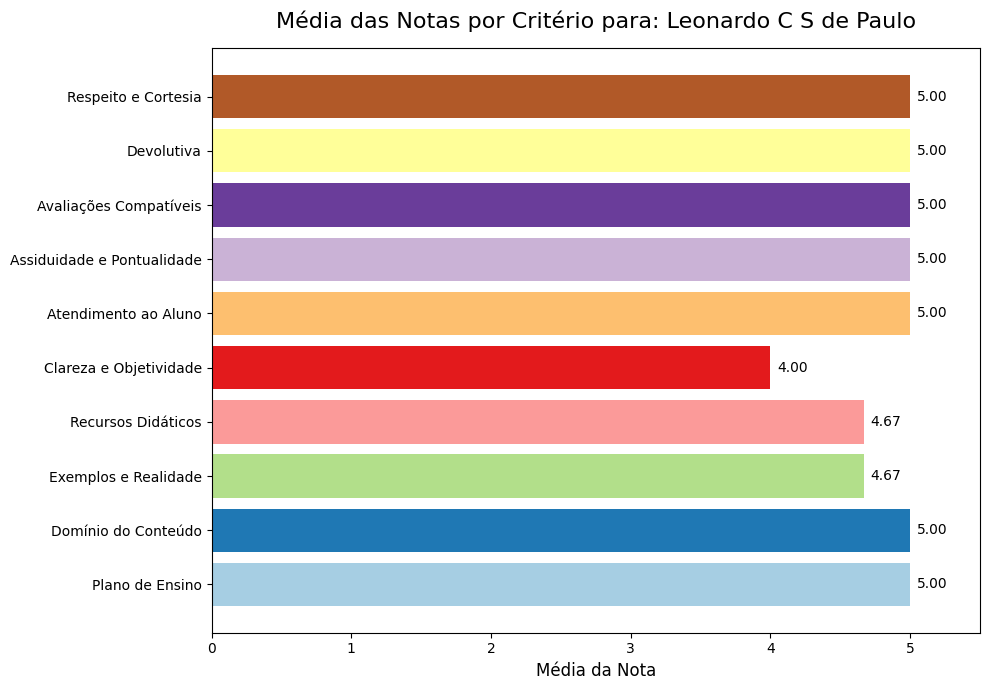

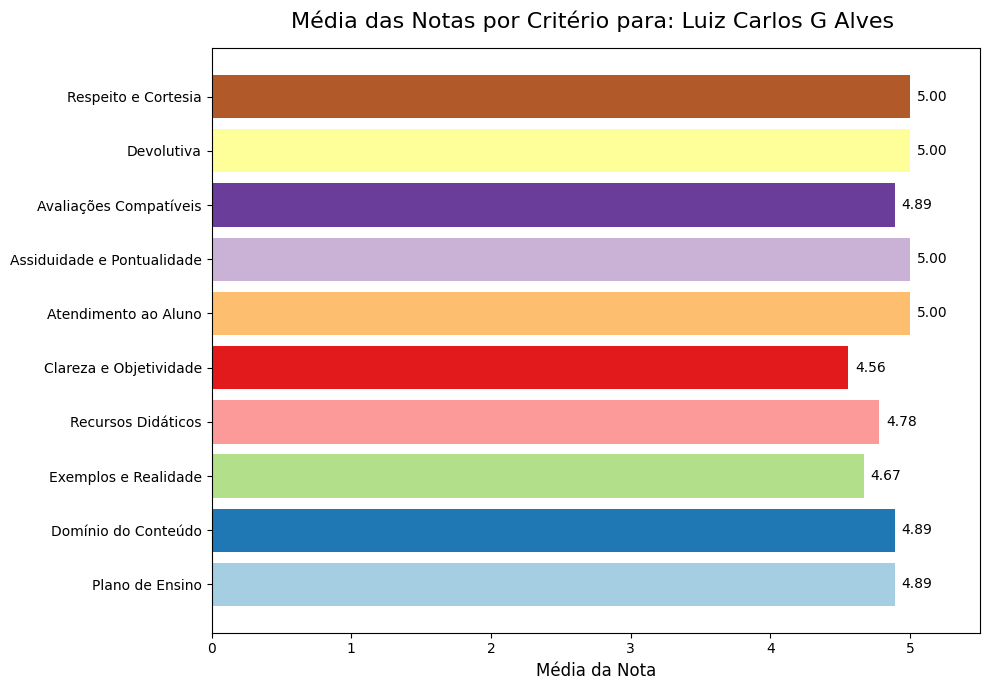

In [ ]:
# Definindo uma paleta de 10 cores do Matplotlib (ideal para até 10 categorias)
# Você pode usar 'tab10', 'Set3', 'Paired', etc.
PALETA_CORES = plt.cm.get_cmap('Paired', len(COLUNAS_RENOMEADAS))

# Converte o mapa de cores em uma lista de cores (ex: para usar em ax.barh)
LISTA_CORES = [PALETA_CORES(i) for i in range(len(COLUNAS_RENOMEADAS))]

for docente, notas_medias in medias_por_docente.iterrows():

        # Cria a figura e os eixos
        fig, ax = plt.subplots(figsize=(10, 7)) # Aumentei um pouco a altura para acomodar mais rótulos

        # Converte a série de médias para um array numpy
        dados_grafico = notas_medias.values

        # GERAÇÃO DO GRÁFICO DE BARRAS HORIZONTAIS:
        # Usamos .barh() ao invés de .bar()
        # Dentro do loop de gráficos, use a lista de cores criada
        ax.barh(COLUNAS_RENOMEADAS, dados_grafico, color=LISTA_CORES)

        # Título do gráfico: Nome do Docente
        ax.set_title(f'Média das Notas por Critério para: {docente}', fontsize=16, pad=15)

        # Rótulos dos eixos
        ax.set_xlabel('Média da Nota', fontsize=12) # Eixo X agora é o valor (nota)
        ax.set_xlim(0, 5.5) # Limita o eixo X entre 0 e 5 (nota máxima)

        # Adiciona os valores das barras ao lado de cada barra
        for i, v in enumerate(dados_grafico):
            # i é a posição no eixo Y (critério), v é o valor no eixo X (nota)
            ax.text(v + 0.05, i, f"{v:.2f}", color='black', va='center', fontsize=10)

        plt.tight_layout()
        plt.show()
      #salvando gráficos
    # 1. Cria um nome de arquivo seguro (removendo caracteres especiais e espaços)
        nome_arquivo_seguro = docente.replace(" ", "_").replace("/", "-").strip()
        caminho_completo = f'grafico_{nome_arquivo_seguro}.jpg'

    # 2. Salva a figura no formato JPG
    # 'dpi=300' garante uma alta qualidade de imagem.
        plt.savefig(caminho_completo, dpi=300, format='jpg')

    # 3. Fecha a figura para liberar memória (importante em loops grandes)
        plt.close(fig)

        print(f"Gráfico salvo: {caminho_completo}")

## Avaliação Geral Professor - Por Curso

Além da avaliação por professor, foi solicitado um gráfico de avaliação da nota geral dada pelos alunos nos questionários. Foi solicitado criação de gráficos sem e com anonimização para usos distintos pelo coordenador em questão

### Sem anonimizar

/tmp/ipython-input-1058570955.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Spectral', num_docentes)


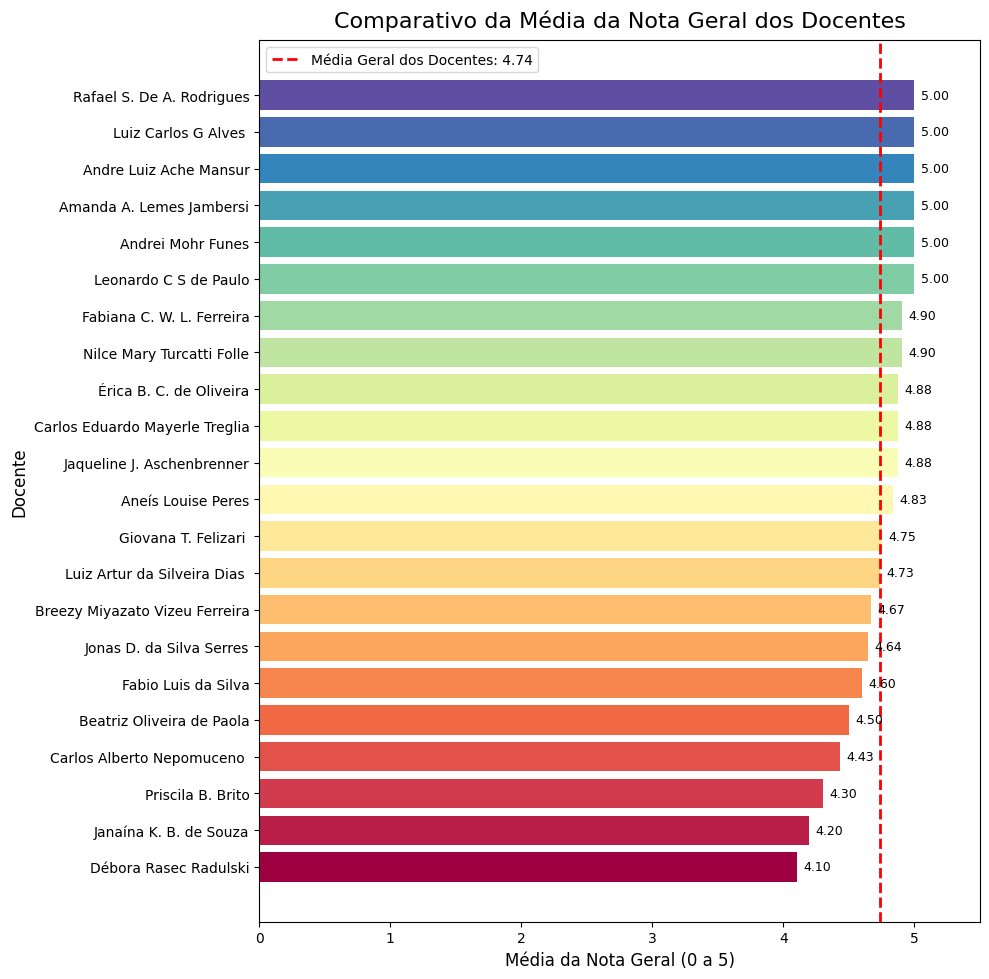

In [12]:
# --- 1. Configurações Iniciais ---
NOME_ARQUIVO = 'NILCE_DADOS_BRUTOS - todos_docentes.csv' #mudar curso

try:
    # --- 2. Leitura e Cálculo da Média ---
    df = pd.read_csv(NOME_ARQUIVO)

    # Calcula a média da 'nota_geral' por docente
    medias_nota_geral = df.groupby('docente')['nota_geral'].mean().reset_index()
    medias_nota_geral.columns = ['Docente', 'Média Nota Geral']

    # Calcula a média geral do curso
    media_geral_curso = medias_nota_geral['Média Nota Geral'].mean()

    # Ordena os docentes pela média (crescente) para o gráfico horizontal (bottom-up)
    medias_nota_geral = medias_nota_geral.sort_values(by='Média Nota Geral', ascending=True)

    # --- 3. Definição de Cores Dinâmicas ---
    num_docentes = len(medias_nota_geral)

    # Usa um mapa de cores do Matplotlib (ex: 'viridis', 'Set1', 'Dark2') para gerar cores dinâmicas
    cmap = plt.cm.get_cmap('Spectral', num_docentes)
    cores_docentes = [cmap(i) for i in range(num_docentes)]

    # --- 4. Geração do Gráfico de Barras Horizontais ---

    docentes = medias_nota_geral['Docente']
    notas = medias_nota_geral['Média Nota Geral']

    # O tamanho da figura (altura) deve ser ajustado para o número de docentes
    fig, ax = plt.subplots(figsize=(10, num_docentes * 0.45)) # Altura dinâmica

    # Cria o gráfico de barras HORIZONTAIS (ax.barh) com cores diferentes
    bars = ax.barh(docentes, notas, color=cores_docentes)

    # --- Configurações Visuais ---

    ax.set_title('Comparativo da Média da Nota Geral dos Docentes', fontsize=16, pad=10)
    ax.set_xlabel('Média da Nota Geral (0 a 5)', fontsize=12) # Eixo X é o valor (nota)
    ax.set_ylabel('Docente', fontsize=12) # Eixo Y é a categoria (docente)

    # Limita o eixo X (o valor da nota) entre 0 e 5
    ax.set_xlim(0, 5.5)

    # Adiciona a linha vertical de referência da Média Geral do Curso
    # ax.axvline é usado para gráficos horizontais
    ax.axvline(media_geral_curso, color='r', linestyle='--', linewidth=2,
               label=f'Média Geral dos Docentes: {media_geral_curso:.2f}')
    ax.legend(fontsize=10)

    # Adiciona os valores das notas ao lado de cada barra
    for bar in bars:
        width = bar.get_width() # A largura é o valor da nota
        ypos = bar.get_y() + bar.get_height()/2 # Posição central na barra
        ax.text(width + 0.05, ypos,
                f'{width:.2f}', ha='left', va='center', fontsize=9)

    plt.tight_layout() # Ajusta para evitar cortes nos rótulos
    plt.show()

except FileNotFoundError:
    print(f"Erro: O arquivo '{NOME_ARQUIVO}' não foi encontrado.")
except Exception as e:
    print(f"Ocorreu um erro no processamento: {e}")

### Com anonimização


/tmp/ipython-input-2587575531.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Spectral', num_docentes)


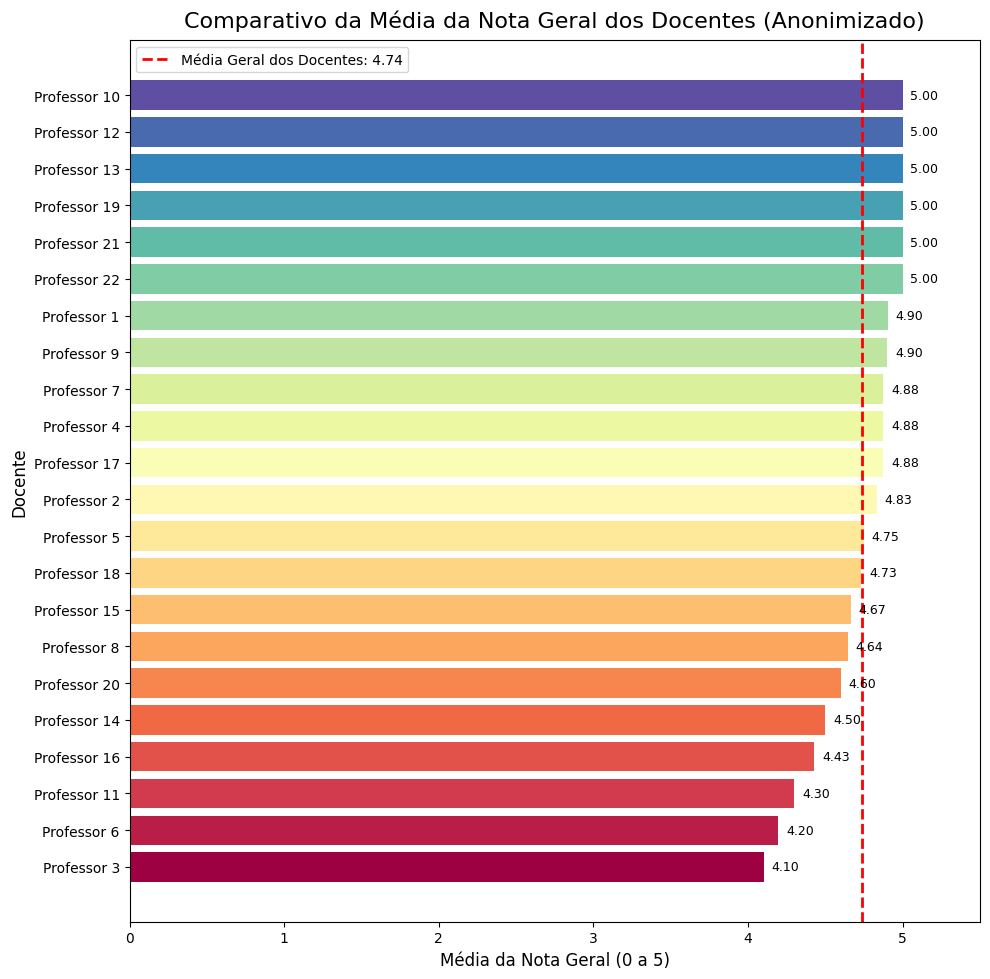

In [11]:
# --- 1. Configurações Iniciais ---
NOME_ARQUIVO = 'NILCE_DADOS_BRUTOS - todos_docentes.csv' ## alterar Curso
COLUNA_DOCENTE = 'docente'

try:
    # --- 2. Leitura e Anonimização dos Dados ---
    df = pd.read_csv(NOME_ARQUIVO)

    # Obtém a lista única de nomes de docentes
    nomes_originais = df[COLUNA_DOCENTE].unique()

    # Cria a lista de nomes anonimizados ('Professor 1', 'Professor 2', ...)
    nomes_anonimizados = [f'Professor {i+1}' for i in range(len(nomes_originais))]

    # 💡 Cria o mapeamento: Nome Original -> Nome Anonimizado
    mapeamento_anonimo = dict(zip(nomes_originais, nomes_anonimizados))

    # Aplica o mapeamento de anonimização à coluna 'docente'
    df['docente_anonimo'] = df[COLUNA_DOCENTE].map(mapeamento_anonimo)

    # --- 3. Cálculo da Média com Nomes Anonimizados ---

    # Calcula a média da 'nota_geral' por docente anonimizado
    medias_nota_geral = df.groupby('docente_anonimo')['nota_geral'].mean().reset_index()
    medias_nota_geral.columns = ['Docente Anonimizado', 'Média Nota Geral']

    # Calcula a média geral do curso
    media_geral_curso = medias_nota_geral['Média Nota Geral'].mean()

    # Ordena os docentes pela média (crescente) para o gráfico horizontal
    medias_nota_geral = medias_nota_geral.sort_values(by='Média Nota Geral', ascending=True)

    # --- 4. Geração do Gráfico de Barras Horizontais Coloridas ---

    docentes = medias_nota_geral['Docente Anonimizado']
    notas = medias_nota_geral['Média Nota Geral']
    num_docentes = len(docentes)

    # Definição de Cores Dinâmicas
    cmap = plt.cm.get_cmap('Spectral', num_docentes)
    cores_docentes = [cmap(i) for i in range(num_docentes)]

    # Ajusta a altura da figura de forma dinâmica
    fig, ax = plt.subplots(figsize=(10, num_docentes * 0.45))

    # Cria o gráfico de barras HORIZONTAIS
    bars = ax.barh(docentes, notas, color=cores_docentes)

    # --- Configurações Visuais ---
    ax.set_title('Comparativo da Média da Nota Geral dos Docentes (Anonimizado)', fontsize=16, pad=10)
    ax.set_xlabel('Média da Nota Geral (0 a 5)', fontsize=12)
    ax.set_ylabel('Docente', fontsize=12)
    ax.set_xlim(0, 5.5)

    # Linha vertical da Média Geral do Curso
    ax.axvline(media_geral_curso, color='r', linestyle='--', linewidth=2,
               label=f'Média Geral dos Docentes: {media_geral_curso:.2f}')
    ax.legend(fontsize=10)

    # Adiciona os valores das notas ao lado de cada barra
    for bar in bars:
        width = bar.get_width()
        ypos = bar.get_y() + bar.get_height()/2
        ax.text(width + 0.05, ypos,
                f'{width:.2f}', ha='left', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()


except FileNotFoundError:
    print(f"Erro: O arquivo '{NOME_ARQUIVO}' não foi encontrado.")
except Exception as e:
    print(f"Ocorreu um erro no processamento: {e}")